# 6.2 Exploring Relationships

## This script contains the following:

### 01. Importing Libraries and Data
### 02. Create Subset of Data
### 03. Exploring Relationships
            Correlations
            Scatterplots
            Pair Plots
            Categorical Plots
### 04. Key Questions
### 05. Hypothesis

       

## 01. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Check the matplotlib version

matplotlib.__version__

'3.7.0'

In [3]:
# Folder Path

path = r'/Users/sanyamohsini/Desktop/CareerFoundry_Data Analytics/Achievement 6'

In [4]:
path

'/Users/sanyamohsini/Desktop/CareerFoundry_Data Analytics/Achievement 6'

In [5]:
# Import us_births.csv

us_births = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'us_births_cleaned.csv'), index_col = False)

In [6]:
# Check import 

us_births.head()

,Unnamed: 0,State,State_abbrev,Year,Gender_baby,Education_level,Education_code,Births,Avg_age_mother,Avg_birth_weight(g)
0,0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


In [7]:
# Columns list

us_births.columns

Index(['Unnamed: 0', 'State', 'State_abbrev', 'Year', 'Gender_baby',
       'Education_level', 'Education_code', 'Births', 'Avg_age_mother',
       'Avg_birth_weight(g)'],
      dtype='object')

In [8]:
# Drop unnamed column

us_births = us_births.drop(columns = ['Unnamed: 0'])

In [9]:
us_births.head()

,State,State_abbrev,Year,Gender_baby,Education_level,Education_code,Births,Avg_age_mother,Avg_birth_weight(g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


In [10]:
# While there is no missing data, education code = 9 is unknown or not stated. For this analysis I will drop education_code = 9.
us_births.drop(us_births[us_births['Education_code'] == 9].index, inplace = True)
print(us_births)

        State State_abbrev  Year Gender_baby  \
0     Alabama           AL  2016           F   
1     Alabama           AL  2016           F   
2     Alabama           AL  2016           F   
3     Alabama           AL  2016           F   
4     Alabama           AL  2016           F   
...       ...          ...   ...         ...   
5490  Wyoming           WY  2021           M   
5491  Wyoming           WY  2021           M   
5492  Wyoming           WY  2021           M   
5493  Wyoming           WY  2021           M   
5494  Wyoming           WY  2021           M   

                                        Education_level  Education_code  \
0                                     8th grade or less               1   
1                9th through 12th grade with no diploma               2   
2                 High school graduate or GED completed               3   
3                 Some college credit, but not a degree               4   
4                             Associate degree (

## 02. Create Subset of Data


#### Explore the following questions:
How does level of education impact number of births?
Does age of mother impact number of births?
Is there any correlation between average age of mother and birth weight?

Since mapping and time analysis will be done later, I am removing "State, "State_Abrrev", "Year". I am also removing variables that are numbers such as Education_level but and Gender.

In [11]:
# Create a subset

us_births_subset = us_births[['Education_code', 'Births', 'Avg_age_mother', 'Avg_birth_weight(g)']]

In [12]:
# Print first 5 rows

us_births_subset.head()

,Education_code,Births,Avg_age_mother,Avg_birth_weight(g)
0,1,1052,27.8,3116.9
1,2,3436,24.1,3040.0
2,3,8777,25.4,3080.0
3,4,6453,26.7,3121.9
4,5,2227,28.9,3174.3


## 03. Exploring Relationships

### Correlations

In [13]:
# Create a correlation matrix using pandas

us_births_subset.corr()

,Education_code,Births,Avg_age_mother,Avg_birth_weight(g)
Education_code,1.000000,-0.039384,0.792772,0.445487
Births,-0.039384,1.000000,-0.124405,-0.049801
Avg_age_mother,0.792772,-0.124405,1.000000,0.516987
Avg_birth_weight(g),0.445487,-0.049801,0.516987,1.000000


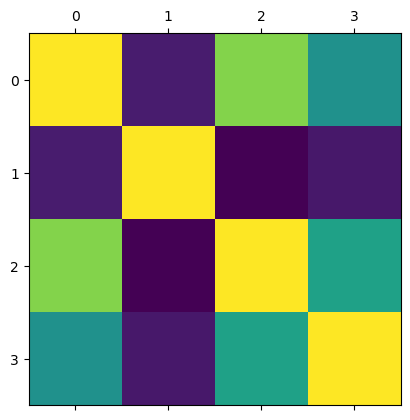

In [14]:
# Create a correlation heatmap using matplotlib

plt.matshow(us_births_subset.corr())
plt.show()

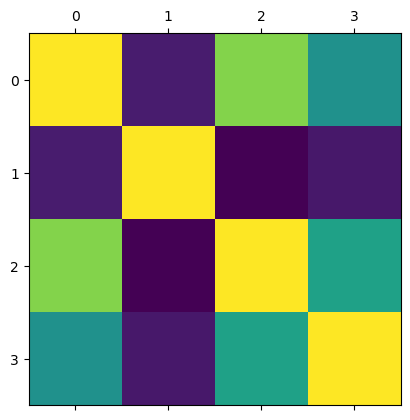

In [15]:
# Save figure
plt.matshow(us_births_subset.corr())
plt.savefig("out.png")

In [16]:
# Current directory
cwd = os.getcwd()
cwd

'/Users/sanyamohsini/Desktop/CareerFoundry_Data Analytics/Achievement 6/03 Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

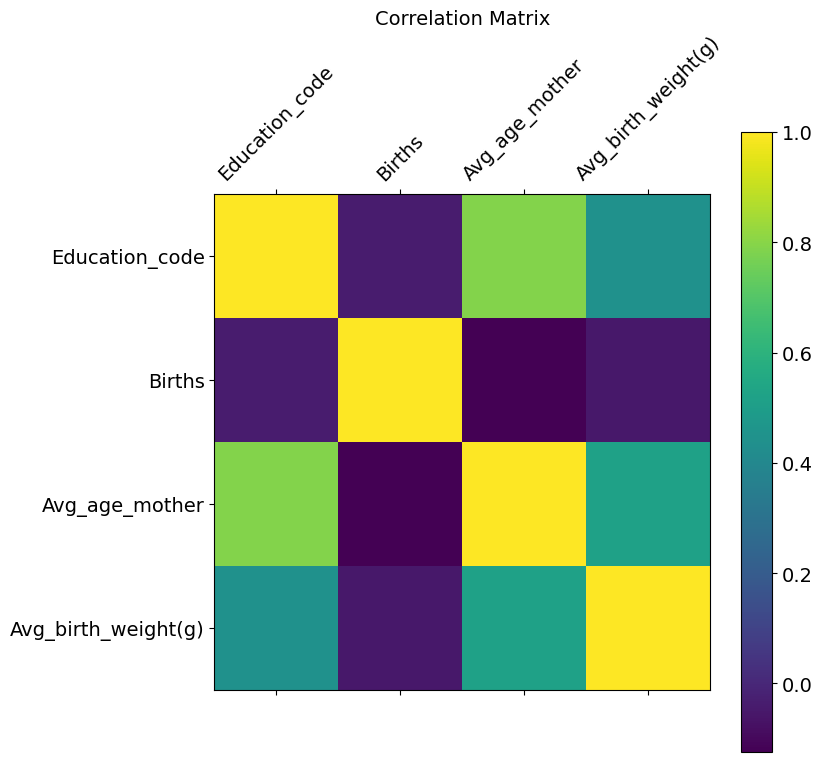

In [17]:
# Add labels, legend, and change size of the heatmap

f = plt.figure(figsize=(8,8)) #figure size
plt.matshow(us_births_subset.corr(), fignum=f.number) #type of plot
plt.xticks(range(us_births_subset.shape[1]), us_births_subset.columns, fontsize=14, rotation=45) #x axis labels
plt.yticks(range(us_births_subset.shape[1]), us_births_subset.columns, fontsize=14) #y axis labels
cb = plt.colorbar() # add a color legend
cb.ax.tick_params(labelsize=14) #add font size
plt.title('Correlation Matrix', fontsize=14) # add title

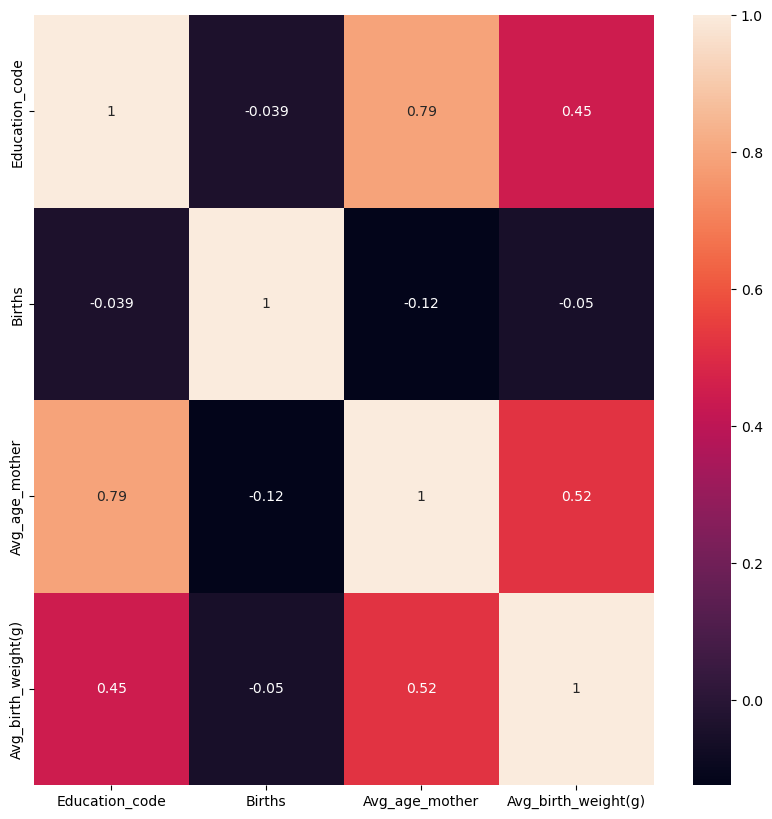

In [18]:
# Create a correlation heatmap using seaborn
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(us_births_subset.corr(), annot = True, ax = ax)

#### There is a strong correlation relationship between education_code and avg_age_mother that would be worth exploring further and makes sense (that the older a mother is the more education they potentially have). Also there is a moderate/strong correlation relationship with avg_birth_weight and avg_age_mother.  It looks like there is a moderate relationship between education_code and avg_birth_weight. There is a weak or no correlation relationship with births and avg_birth_weight and births and avg_age_mother.  I was surprised that there wasn't a stronger relationship between births and avg_age_mother, as I thought there would be more births as women age. 

### Scatterplots

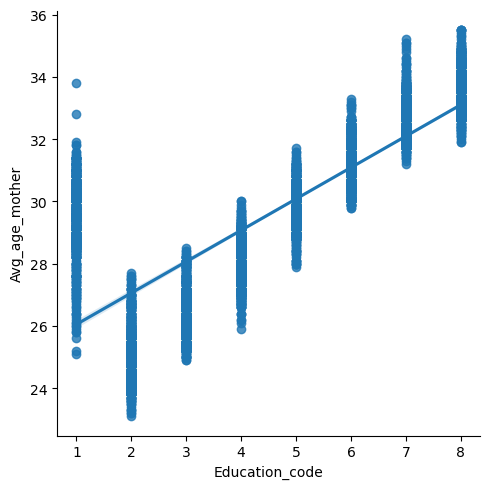

In [37]:
# Making a scatterplot of education_code and avg_age_mother

sns.lmplot( x = 'Education_code', y = 'Avg_age_mother', data = us_births_subset)
#This shows that there is a strong relationship between age of mother and education level. The only education level that has a wide range of ages is 1= 8th grade or less, which makes sense as most women have at least an education of up to 8th grade.

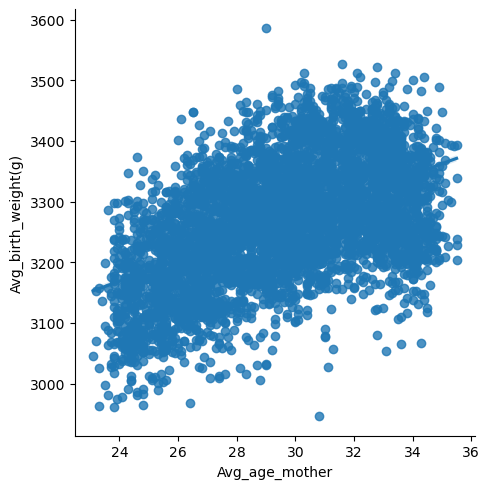

In [38]:
# Making a scatterplot of avg_birth_weight and avg_age_mother

sns.lmplot( x = 'Avg_age_mother', y = 'Avg_birth_weight(g)', data = us_births_subset)
# The scatterplot shows a moderate relationship between avg_avg_mother and avg_birth_weight. The majority of avg_birth_weights are between 3000-3400 grams. There looks like there are outliers for woman ages 25-35. It also looks like that when a woman is older the avg weight of a baby is slightly higher on average.

### Pair Plots

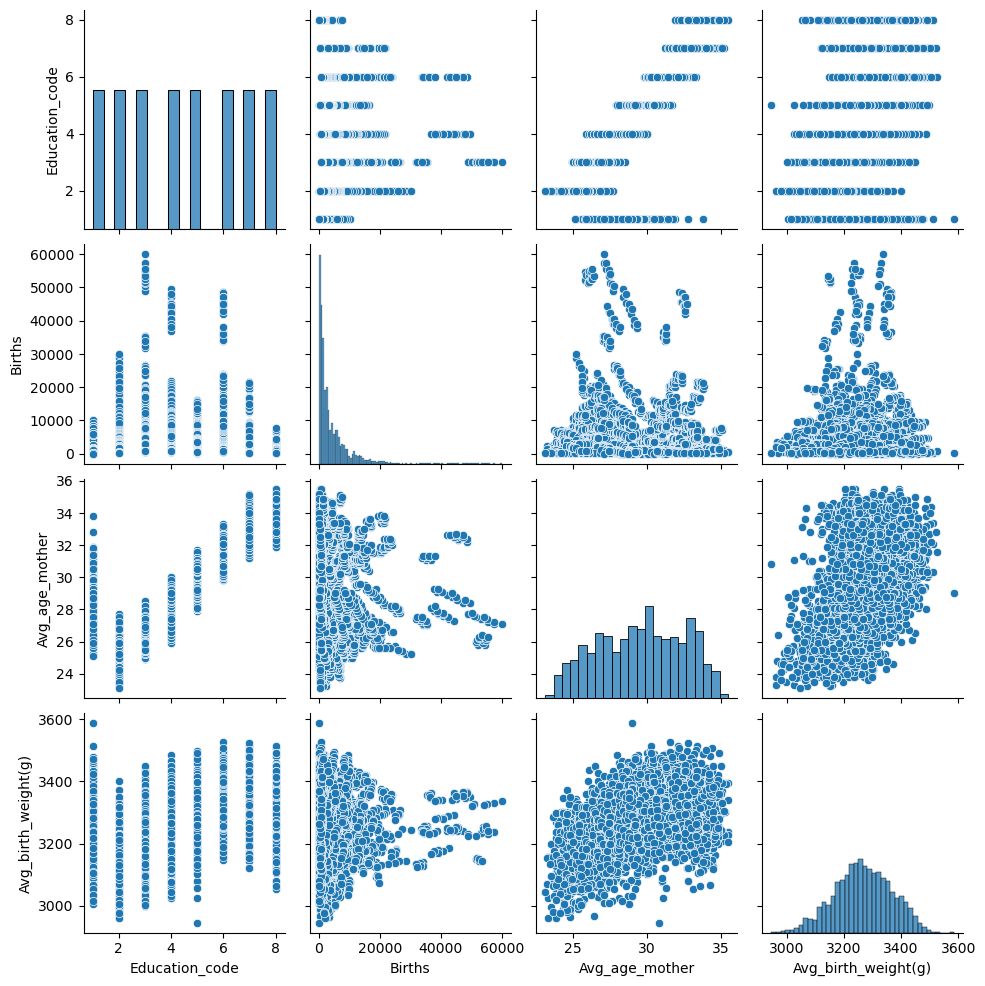

In [39]:
# Create a pair plot
g = sns.pairplot(us_births_subset)

#### This supports that there is a strong relationship between education and age of mother. It also appears that there is a relationship between birth weight and education as well as eduation and birth weight. 


### Categorical Plots

<Axes: xlabel='Avg_birth_weight(g)', ylabel='Count'>

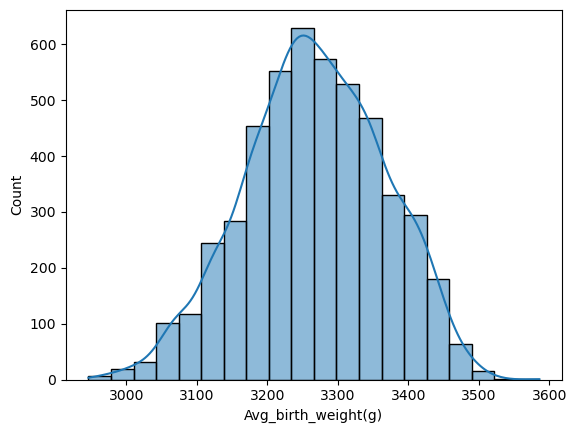

In [40]:
#Creating a categorical vairable that splits "Avg_birth_weight(g)" column into categories
#Using a histogram to visualiza the distribution of the variables

sns.histplot(us_births_subset['Avg_birth_weight(g)'], bins= 20, kde = True)

In [41]:
us_births_subset.loc[us_births_subset['Avg_birth_weight(g)'] <= 3120, 'Birth_weight_category'] = 'Low birth weight'

/var/folders/x7/xxbpt4416fz0ffkv1ft07lnr0000gn/T/ipykernel_78336/857662036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_births_subset.loc[us_births_subset['Avg_birth_weight(g)'] <= 3120, 'Birth_weight_category'] = 'Low birth weight'


In [42]:
us_births_subset.loc[(us_births_subset['Avg_birth_weight(g)'] > 3120) & (us_births_subset['Avg_birth_weight(g)'] <=3420), 'Birth_weight_category'] = 'Normal birth weight'

In [43]:
us_births_subset.loc[us_births_subset['Avg_birth_weight(g)'] > 3420, 'Birth_weight_category'] = 'High birth weight'

In [44]:
#Checking the results
us_births_subset['Birth_weight_category'].value_counts(dropna=False)


Normal birth weight    4225
Low birth weight        372
High birth weight       299
Name: Birth_weight_category, dtype: int64

In [45]:
us_births_subset.columns

Index(['Education_code', 'Births', 'Avg_age_mother', 'Avg_birth_weight(g)',
       'Birth_weight_category'],
      dtype='object')

In [46]:
us_births_subset.head()

,Education_code,Births,Avg_age_mother,Avg_birth_weight(g),Birth_weight_category
0,1,1052,27.8,3116.9,Low birth weight
1,2,3436,24.1,3040.0,Low birth weight
2,3,8777,25.4,3080.0,Low birth weight
3,4,6453,26.7,3121.9,Normal birth weight
4,5,2227,28.9,3174.3,Normal birth weight


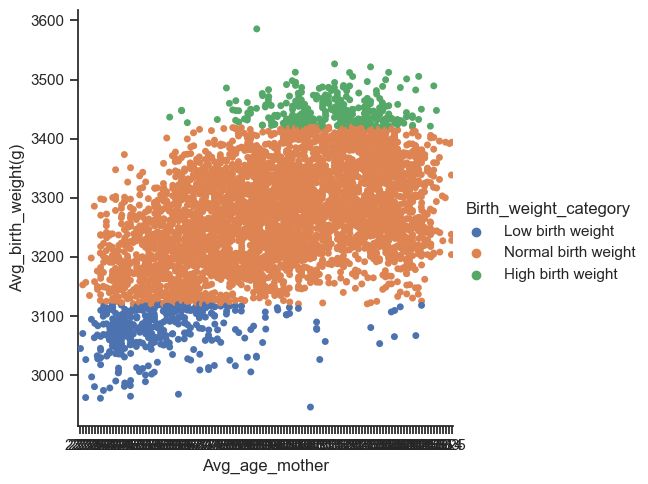

In [47]:
# Create a categorical plot in seaborn using the birth weight category created above

sns.set(style="ticks")
categorical = sns.catplot(x= "Avg_age_mother", y= "Avg_birth_weight(g)", hue="Birth_weight_category", data=us_births_subset)

#### This chart shows that there are more low birth weights with younger mothers and more high birth weights with older mothers. Normal birth weights can be seen in all ages of mothers. 

## 04. Key Questions

How does level of education impact number of births? 
-There is a weak correlation between level of education and number of births. This was surprinsing and worth investigating more. 

Does age of mother impact number of births? 
-There is a weak correlation between average age of mother and number of births. This is also surprising and wroth investigating more. It would be interesting to also also categorize age of mother into young, middle and older to see if there are any trends. 

Is there any correlation between average age of mother and birth weight?
-Yes there is a moderate/strong correlation between avg_birth_weight and avg_age_mother which was surprising. Young mothers will have more low birth weights vs older mothers will have heigher birth weights.

Is there any correlation between level of educaiton and average age of mother?
-Yes there is a strong correlation between level of education and avg_age_mother. This makes sense as there are more education opportunities the older you get.

## 05. Hypotheses to test

#### The older a woman is the higher level of education they will have.
#### The older a woman is their baby will have a higher birth weight.
#### More educated women have babys with a higher birth weight. 
#### If a state has less educated women they will have more births.
#### If a women is very young or very old they will have less births. 

In [48]:
# Export Data
us_births.to_csv(os.path.join(path, '02 Data','Prepared data', 'us_births_cleaned_2.csv'))